# OPAN 6609 Text Analytics

**Assignment 1: Transforming text for business insights**

Mike Johnson
****

## Set Up

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

****

## 1. Read in the peanuts_reviews.csv Download peanuts_reviews.csv dataset.

In [5]:
# Load dataset
df = pd.read_csv('peanuts_reviews.csv')

df

,rating,text,summary
0,1,Not a great value,F
1,2,not the best snack.,Two Stars
2,2,"I would have given this a 4 or 5 ,but the salt...","Great, except one"
3,1,terrible after taste,One Star
4,1,You can buy at Walmart for $6.98,One Star
...,...,...,...
488,5,perfect,Five Stars
489,5,"Good buy, as described, packed well and on time",Good choice
490,5,Tastes more like buffalo seasoning over roaste...,Five Stars
491,5,These are super addicting.,"If you love nuts, try Deez Nuts."


### 1.1. How many reviews are there?

In [8]:
# Get count of reviews
review_count = df.shape[0]

print(f"Number of reviews: {review_count}")

Number of reviews: 493


### 1.2.  What percentage of the reviews are positive (4 or 5) and what percentage are negative (1 or 2) reviews?

In [9]:
# Define positive, negative, neutral conditions
rating_dict = {1: "Negative",
               2: "Negative",
               3: "Neutral",
               4: "Positive",
               5: "Positive"}

# Map rating_dict to df
df['rating_category'] = df['rating'].map(rating_dict)

df

,rating,text,summary,rating_category
0,1,Not a great value,F,Negative
1,2,not the best snack.,Two Stars,Negative
2,2,"I would have given this a 4 or 5 ,but the salt...","Great, except one",Negative
3,1,terrible after taste,One Star,Negative
4,1,You can buy at Walmart for $6.98,One Star,Negative
...,...,...,...,...
488,5,perfect,Five Stars,Positive
489,5,"Good buy, as described, packed well and on time",Good choice,Positive
490,5,Tastes more like buffalo seasoning over roaste...,Five Stars,Positive
491,5,These are super addicting.,"If you love nuts, try Deez Nuts.",Positive


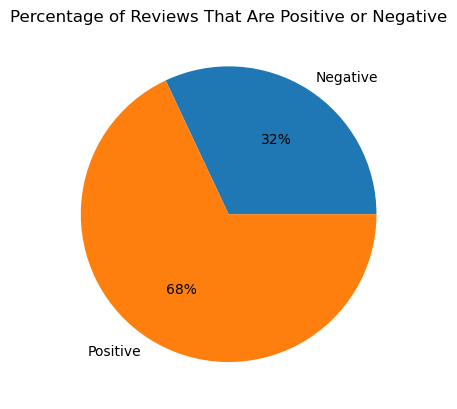

In [18]:
# Summary table rating category
rating_pos_neg = df.groupby(['rating_category']).size().reset_index(name = 'count')
rating_pos_neg['percent_total'] = (rating_pos_neg['count'] / rating_pos_neg['count'].sum()).round(2)

# Visualize Results
plt.pie(rating_pos_neg['percent_total'], labels = rating_pos_neg['rating_category'], autopct = '%1.f%%')
plt.title('Percentage of Reviews That Are Positive or Negative')
plt.show()

In [29]:
# Print the percent positive
percentage_positive = rating_pos_neg.loc[rating_pos_neg['rating_category'] == 'Positive', 'percent_total'].item()
print(f"Percentage that are positive: {percentage_positive * 100:.0f}%")

# Print the percent negative
percentage_negative = rating_pos_neg.loc[rating_pos_neg['rating_category'] == 'Negative', 'percent_total'].item()
print(f"Percentage that are negative: {percentage_negative * 100:.0f}%")


Percentage that are positive: 68%
Percentage that are negative: 32%


****

## 2. Generate a two wordclouds: one for good reviews and one for bad reviews. Provide a short (2-3 sentences) explanation of what the wordcloud does and any noteworthy insights we can see.

### Good Reviews

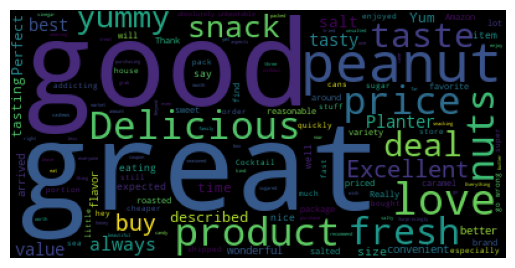

In [36]:
# Create wordcloud with good reviews
wc_good_reviews = WordCloud().generate(" ".join(df.loc[df['rating_category'] == 'Positive', 'text']))
plt.axis("off")
plt.imshow(wc_good_reviews)
plt.show()

### Bad Reviews

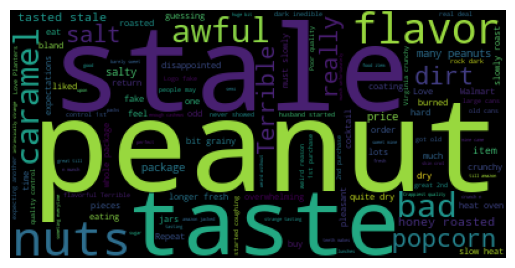

In [ ]:
# Create wordcloud with bad reviews
wc_bad_reviews = WordCloud().generate(" ".join(df.loc[df['rating_category'] == 'Negative', 'text']))
plt.axis("off")
plt.imshow(wc_bad_reviews)
plt.show()

### Explanation and Insights

A word cloud is a method for visualizing the most frequently used words in text data. The size of each word corresponds with the frequency of that word in the data. This means more frequent words will appear larger while less frequent words are smaller.

Based on the two word clouds, we can see that both have words that reflect the sentiment (e.g., good, great, bad, awful). Good reviews reflect higher frequency words referencing the taste and the price. Bad reivews reflect high frequency of the word, 'stale'. These word clouds suggest that freshness of the product determined whether a customer provided a positive or negative review.

****

## 3. Using scikit-learn's CountVectorizer, what are top five most frequent single words (unigrams) used in positive reviews? What are top five most frequent single words used in negative reviews? (For questions 3-5, exclude the default English stopwords from scikit-learn's vectorizer)

In [62]:
def top_ngrams(text, ngrams = (1,1), top_n=5):
    """
    Extract top N most frequent unigrams - more efficient version
    
    Parameters:
    text (list): List of text strings to analyze
    ngrams (tuple): n_gram range for vectorizer
    top_n (int): Number of top words to return
    
    Returns:
    pandas.DataFrame: DataFrame with 'term' and 'frequency' columns
    """
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(
        ngram_range= ngrams,
        stop_words='english',
        lowercase=True
    )
    
    # Fit and transform the text
    word_matrix = vectorizer.fit_transform(text)
    
    # Get feature names and sum frequencies
    feature_names = vectorizer.get_feature_names_out()
    frequencies = np.array(word_matrix.sum(axis=0)).flatten()
    
    # Create DataFrame
    result_df = pd.DataFrame({
        'term': feature_names,
        'frequency': frequencies
    })
    
    # Sort and return top n
    return result_df.sort_values('frequency', ascending=False).head(top_n).reset_index(drop=True)

### Top 5 Unigrams in Positive Reviews

In [65]:
# Run function to see top 5 unigrams in positive reviews
top_ngrams(df.loc[df['rating_category'] == 'Positive', 'text'], (1,1), 5)

,term,frequency
0,great,88
1,good,84
2,peanuts,46
3,love,26
4,product,24


### Top 5 Unigrams in Negative Reviews

In [68]:
# Run function to see top 5 unigrams in negative reviews
top_ngrams(df.loc[df['rating_category'] == 'Negative', 'text'], (1,1), 5)

,term,frequency
0,peanuts,38
1,stale,37
2,like,28
3,taste,24
4,nuts,20


****

## 4. What are top five most frequent two word phrases used in positive reviews? What are top five most frequent two word phrases used in negative reviews?

### Top Bigrams in Positive Reviews

In [70]:
# Run function to see top 5 bi in positive reviews
top_ngrams(df.loc[df['rating_category'] == 'Positive', 'text'], (2,2), 5)

,term,frequency
0,great price,9
1,great value,7
2,good price,7
3,good product,6
4,great product,6


### Top Bigrams in Negative Reviews

In [71]:
# Run function to see top 5 bi in negative reviews
top_ngrams(df.loc[df['rating_category'] == 'Negative', 'text'], (2,2), 5)

,term,frequency
0,like dirt,8
1,terrible taste,8
2,tasted stale,7
3,honey roasted,7
4,awful coating,4


****

## 5. Create two plots: one with the 10 most common two word phrases used in negative reviews and their frequencies (order the phrases by frequency) and one with the 10 most common two word phrases used in positive reviews and their frequencies (order the phrases by frequency).

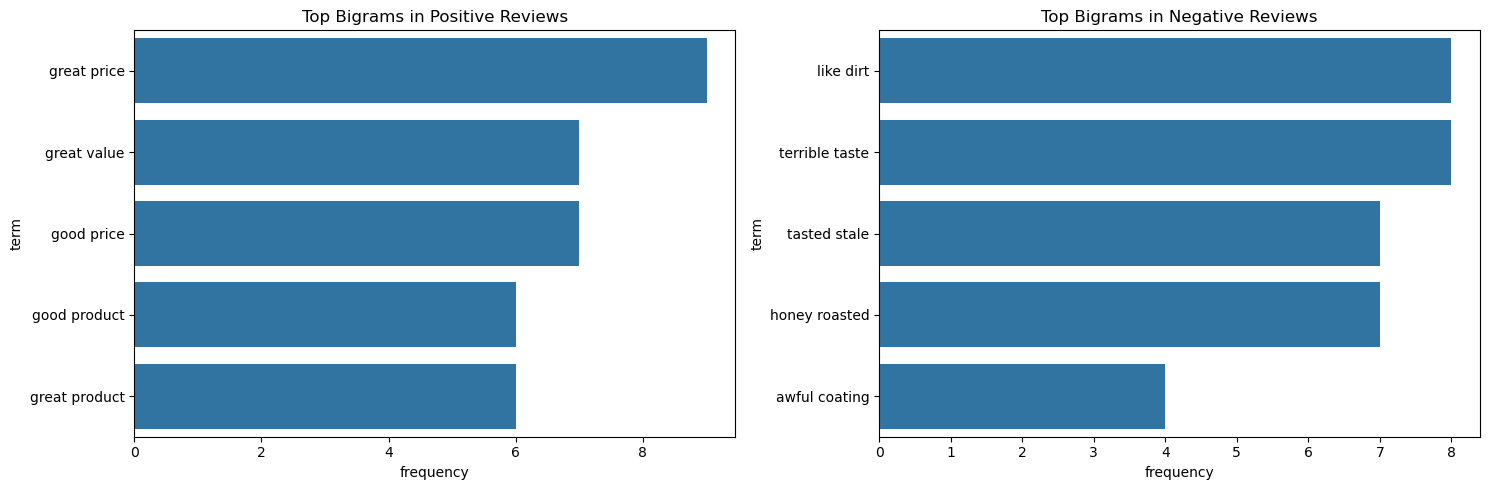

In [80]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Visualize positive bigrams on the first subplot (axes[0])
sns.barplot(x="frequency", 
            y="term", 
            data=top_ngrams(df.loc[df['rating_category'] == 'Positive', 'text'], (2,2), 5),
            ax=axes[0])
axes[0].set_title('Top Bigrams in Positive Reviews')

# Visualize negative bigrams on the second subplot (axes[1])
sns.barplot(x="frequency", 
            y="term", 
            data=top_ngrams(df.loc[df['rating_category'] == 'Negative', 'text'], (2,2), 5),
            ax=axes[1])
axes[1].set_title('Top Bigrams in Negative Reviews')

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
plt.show()

### 5.1. What aspects of the product are positive reviewers mentioning? What are the negative reviewers mentioning?